# Kickstarter Data Analysis

# Contents

- [Imports](#Imports)
- [Missing and Duplicate Data](#Missing-and-Duplicate-Data)
- [Univariate Analysis](#Univariate-Analysis)
- [Bivariate Analysis](#Bivariate-Analysis)
- [Outliers](#Outliers)
- [Extra Credit](#Extra-Credit)

# Imports

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
cd kickstarter-projects/

[Errno 2] No such file or directory: 'kickstarter-projects/'
/Users/julio0703/Documents/kaggle_data_projects/downloaded_data_folder/kickstarter-projects


In [19]:
kick = pd.read_csv('ks-projects-201801.csv')

In [20]:
kick.shape

(378661, 15)

In [21]:
kick.head(3)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00


# Missing and Duplicate Data

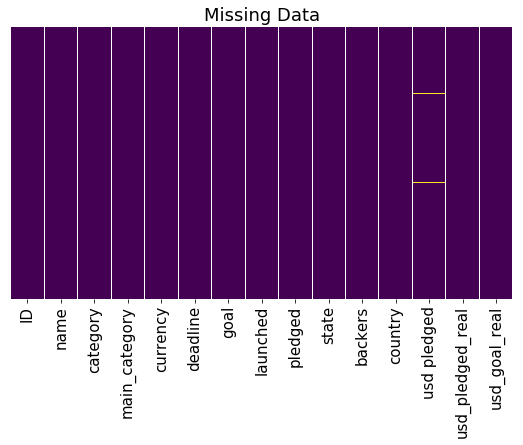

In [22]:
plt.figure(figsize=(9,5))
sns.heatmap(kick.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.title('Missing Data',fontsize=18)
plt.xticks(fontsize=15)
plt.show()

There seems to be some missing data on the usd_pledged column. Other than that, the dataframe seems to be complete.

In [23]:
kick.duplicated().value_counts()

False    378661
dtype: int64

There isn't a single row of duplicate information. 

# Univariate Analysis

In [24]:
kick['main_category'].nunique()
print('The main_category column has ' + str(kick['main_category'].nunique()) + ' unique values.')
print('The category column has ' + str(kick['category'].nunique()) + ' unique values.')

The main_category column has 15 unique values.
The category column has 159 unique values.


The main_category column is more general and the category column is more descriptive.

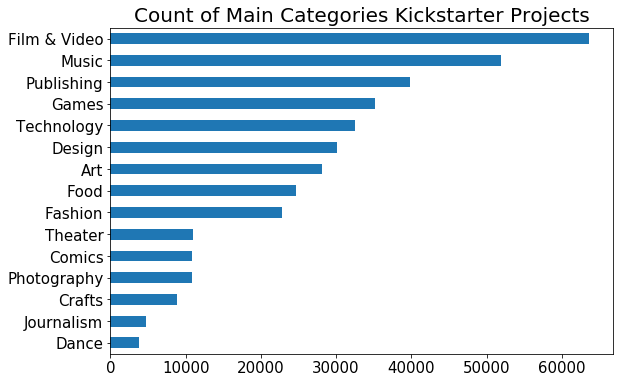

Film & Video    63585
Music           51918
Publishing      39874
Games           35231
Technology      32569
Design          30070
Art             28153
Food            24602
Fashion         22816
Theater         10913
Comics          10819
Photography     10779
Crafts           8809
Journalism       4755
Dance            3768
Name: main_category, dtype: int64


In [25]:
kick['main_category'].value_counts().sort_values(ascending=True).tail(20).plot(kind='barh',
                                         figsize=(9,6),
                                         fontsize=15)
plt.title('Count of Main Categories Kickstarter Projects',fontsize=20)
plt.show()
print(kick['main_category'].value_counts())

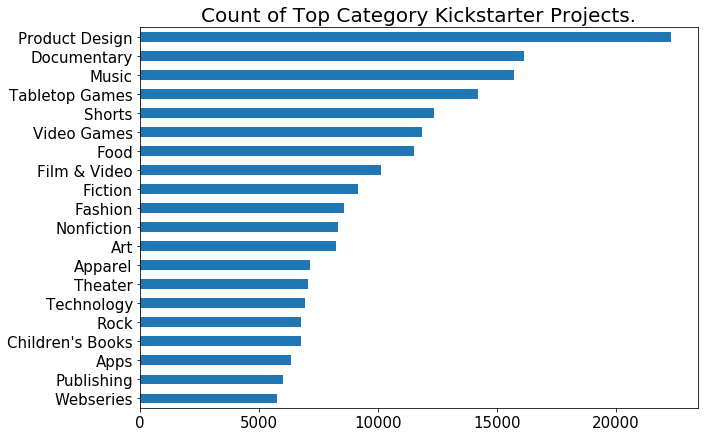

Product Design      22314
Documentary         16139
Music               15727
Tabletop Games      14180
Shorts              12357
Video Games         11830
Food                11493
Film & Video        10108
Fiction              9169
Fashion              8554
Nonfiction           8318
Art                  8253
Apparel              7166
Theater              7057
Technology           6930
Rock                 6758
Children's Books     6756
Apps                 6345
Publishing           6018
Webseries            5762
Name: category, dtype: int64


In [26]:
kick['category'].value_counts().sort_values(ascending=True).tail(20).plot(kind='barh',
                                                                         figsize=(10,7),
                                                                         fontsize=15)
plt.title('Count of Top Category Kickstarter Projects.',fontsize=20)
plt.show()
print(kick['category'].value_counts().head(20))

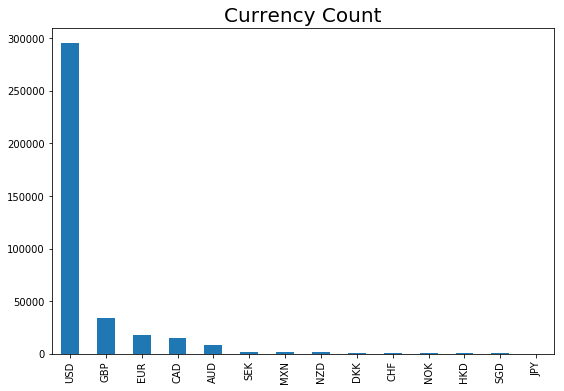

Currency Count:

USD    295365
GBP     34132
EUR     17405
CAD     14962
AUD      7950
SEK      1788
MXN      1752
NZD      1475
DKK      1129
CHF       768
NOK       722
HKD       618
SGD       555
JPY        40
Name: currency, dtype: int64


In [27]:
kick['currency'].value_counts().plot(kind='bar',
                                     figsize=(9,6))
plt.title('Currency Count',fontsize=20)
plt.show()
print('Currency Count:\n')
print(kick['currency'].value_counts())

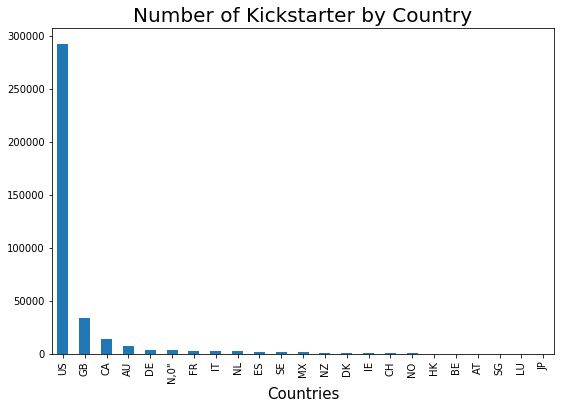

Country Count:

US      292627
GB       33672
CA       14756
AU        7839
DE        4171
N,0"      3797
FR        2939
IT        2878
NL        2868
ES        2276
SE        1757
MX        1752
NZ        1447
DK        1113
IE         811
CH         761
NO         708
HK         618
BE         617
AT         597
SG         555
LU          62
JP          40
Name: country, dtype: int64


In [28]:
kick['country'].value_counts().sort_values(ascending=False).plot(kind='bar',
                                                                 figsize=(9,6))
plt.title('Number of Kickstarter by Country',fontsize=20)
plt.xlabel('Countries',fontsize=15)
plt.show()
print('Country Count:\n')
print(kick['country'].value_counts().sort_values(ascending=False))

In [29]:
kick[kick['currency']=='GBP']['country'].value_counts()

GB      33672
N,0"      460
Name: country, dtype: int64

Currency and Country columns look very similar. There are a few differences though. Nothing too surprising.

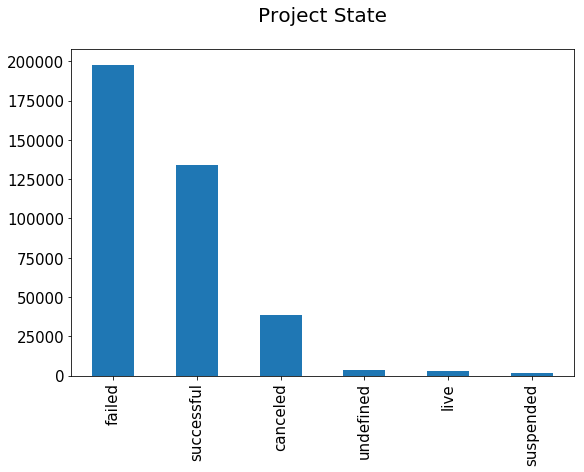

failed        197719
successful    133956
canceled       38779
undefined       3562
live            2799
suspended       1846
Name: state, dtype: int64

Only 35.4% of Kickstarter projects turned out to be successful.


In [33]:
kick['state'].value_counts().plot(kind='bar',
                                  figsize=(9,6),
                                  fontsize=15)
plt.title('Project State\n',fontsize=20)
plt.show()
print(kick['state'].value_counts())
print('\nOnly {}% of Kickstarter projects turned out to be successful.'.format(str(round(len(kick[kick['state']=='successful']) / len(kick['state']),3)*100)))

In [34]:
type(kick['launched'][0])

str

Seems that the 'launched' date field is a string. Let's convert it to a pandas.Timestamp object.

In [35]:
kick['launched'] = pd.to_datetime(kick['launched'])

In [36]:
type(kick['launched'][0])

pandas._libs.tslib.Timestamp

Great! Now that our 'launched' column is a timestamp type, let's create a couple new columns isolating launch month and launch year!!

In [37]:
kick['launched_month'] = kick['launched'].apply(lambda x: x.month)
kick['launched_year'] = kick['launched'].apply(lambda x: x.year)

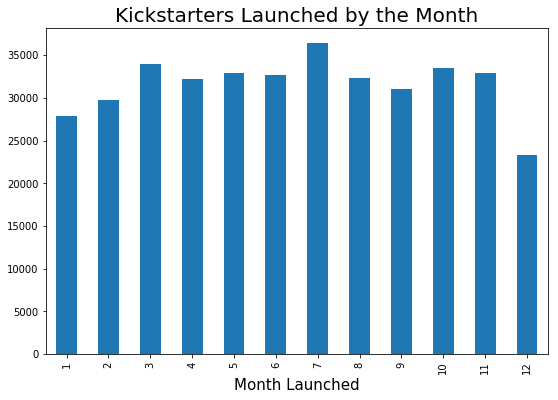

launched_month
1     27841
2     29732
3     33946
4     32260
5     32888
6     32623
7     36367
8     32291
9     31069
10    33490
11    32890
12    23264
Name: launched_month, dtype: int64


In [38]:

kick.groupby('launched_month')['launched_month'].count().plot(kind='bar',
                                                              figsize=(9,6))
plt.title('Kickstarters Launched by the Month',fontsize=20)
plt.xlabel('Month Launched',fontsize=15)
plt.show()
print(kick.groupby('launched_month')['launched_month'].count())

December and January seem to be a slow months for Kickstarter. Hmm. Holidays anyone???

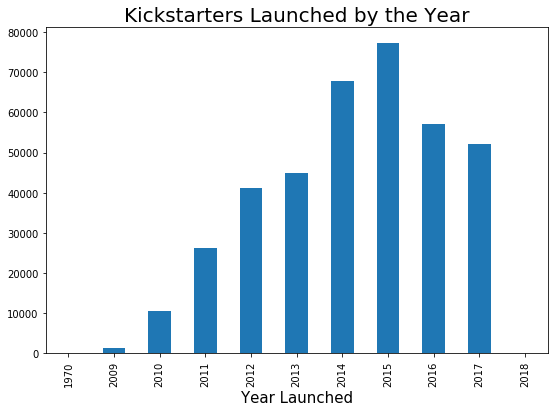

launched_year
1970        7
2009     1329
2010    10519
2011    26237
2012    41165
2013    44851
2014    67745
2015    77300
2016    57184
2017    52200
2018      124
Name: launched_year, dtype: int64


In [39]:
kick.groupby('launched_year')['launched_year'].count().plot(kind='bar',
                                                            figsize=(9,6))
plt.title('Kickstarters Launched by the Year',fontsize=20)
plt.xlabel('Year Launched',fontsize=15)
plt.show()
print(kick.groupby('launched_year')['launched_year'].count())

Looks like Kickerstarter's peak usage was 2015. I wonder why they dipped down afterwards?

HAHA. Also, who launched a kickstarter in 1970?????

In [40]:
kick[kick['launched_year']==1970]

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,launched_month,launched_year
2842,1014746686,Salt of the Earth: A Dead Sea Movie (Canceled),Film & Video,Film & Video,USD,2010-09-15,5000.0,1970-01-01 01:00:00,0.0,canceled,0,US,0.0,0.0,5000.00,1,1970
48147,1245461087,1st Super-Size Painting - Social Network Owned...,Art,Art,USD,2010-08-14,15000.0,1970-01-01 01:00:00,0.0,canceled,0,US,0.0,0.0,15000.00,1,1970
75397,1384087152,"""ICHOR"" (Canceled)",Film & Video,Film & Video,USD,2010-05-21,700.0,1970-01-01 01:00:00,0.0,canceled,0,US,0.0,0.0,700.00,1,1970
94579,1480763647,"Support Solo Theater! Help ""Ungrateful Daughte...",Theater,Theater,USD,2010-06-01,4000.0,1970-01-01 01:00:00,0.0,canceled,0,US,0.0,0.0,4000.00,1,1970
247913,330942060,"Help RIZ Make A Charity Album: 8 Songs, 8 Caus...",Music,Music,USD,2010-05-04,10000.0,1970-01-01 01:00:00,0.0,canceled,0,US,0.0,0.0,10000.00,1,1970
273779,462917959,Identity Communications Infographic (Canceled),Design,Design,USD,2010-04-10,500.0,1970-01-01 01:00:00,0.0,canceled,0,US,0.0,0.0,500.00,1,1970
319002,69489148,Student Auditions Music 2015,Publishing,Publishing,CHF,2015-10-31,1900.0,1970-01-01 01:00:00,0.0,suspended,0,CH,0.0,0.0,1905.97,1,1970


0 pledges, all canceled or suspended

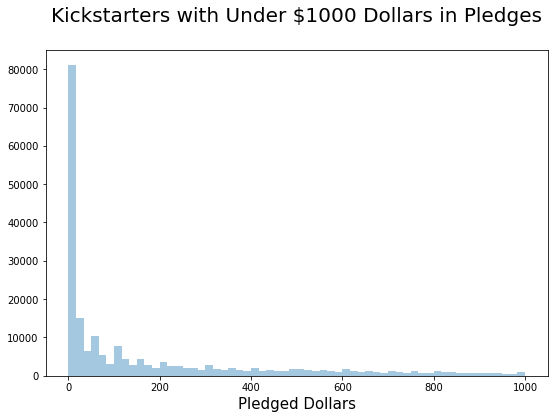

55% of Kickerstart projects made less than $1000 dollars worth in pledges.


In [41]:
plt.figure(figsize=(9,6))
sns.distplot(kick[kick['pledged']<=1000]['pledged'],kde=False,bins=60)
plt.title('Kickstarters with Under $1000 Dollars in Pledges\n',fontsize=20)
plt.xlabel('Pledged Dollars',fontsize=15)
plt.show()
print('{}% of Kickerstart projects made less than $1000 dollars worth in pledges.'.format(round(len(kick[kick['pledged']<=1000]) / (len(kick))*100),2))

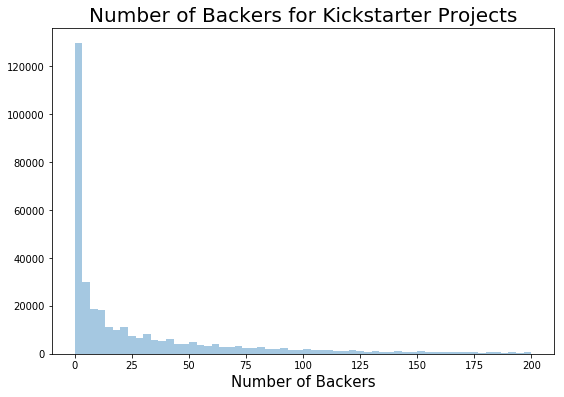

8% of Kickstarter Projects got more than 200 backers.


In [42]:
plt.figure(figsize=(9,6))
sns.distplot(kick[kick['backers']<=200]['backers'],kde=False,bins=60)
plt.title('Number of Backers for Kickstarter Projects',fontsize=20)
plt.xlabel('Number of Backers',fontsize=15)
plt.show()
print('{}% of Kickstarter Projects got more than 200 backers.'.format(round(len(kick[kick['backers']>=200]) / len(kick) * 100)))

Seems that most kickstarters don't get very many pledges.

# Bivariate Analysis

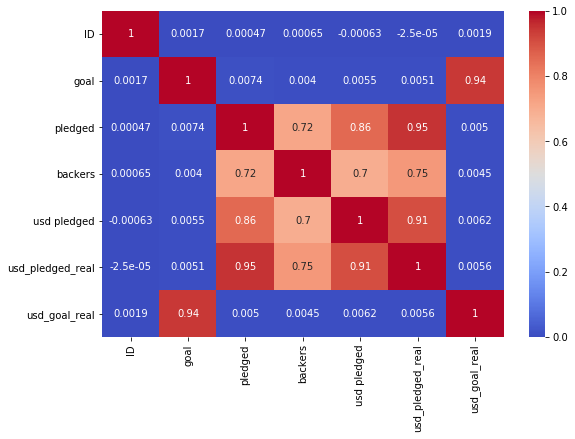

In [43]:
plt.figure(figsize=(9,6))
sns.heatmap(kick.drop(['launched_month','launched_year'],axis=1).corr(),cmap='coolwarm',annot=True)
plt.show()

The main take away from this heatmap is the correlation between the 'backers' column and the 'pledged' column. It is no surprise that the two column are correlated. The correlation between 'pledged' and 'usd_pledged_real' or between 'goal' and 'usd_goal_real' doesn't pop out at me. 

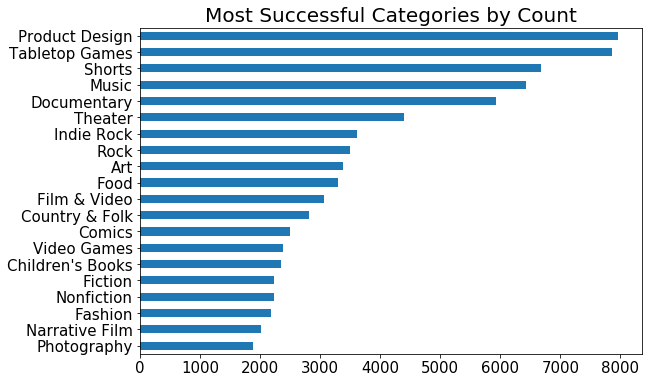

In [44]:
success_cat = kick[kick['state']=='successful']['category'].value_counts().sort_values(ascending=True).tail(20)
success_cat.plot(kind='barh',
                 figsize=(9,6),
                 fontsize=15)
plt.title('Most Successful Categories by Count',fontsize=20)
plt.show()

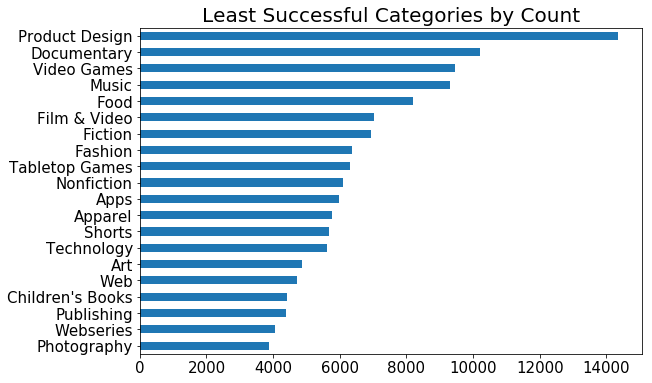

In [45]:
notSuccess_cat = kick[kick['state']!='successful']['category'].value_counts().sort_values(ascending=True).tail(20)
notSuccess_cat.plot(kind='barh',
                    figsize=(9,6),
                    fontsize=15)
plt.title('Least Successful Categories by Count',fontsize=20)
plt.show()

Product Design, Tabletop Games, Music, and Documentary are both top 10 for categories that are successfull and unsuccessful. 

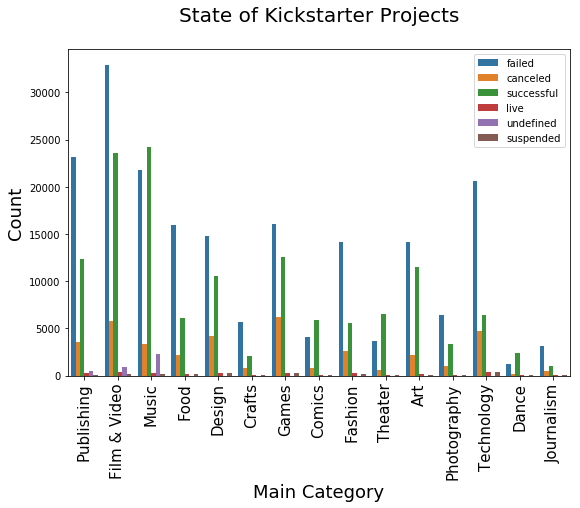

In [46]:
fig,ax = plt.subplots(figsize=(9,6))
sns.countplot(kick['main_category'],hue=kick['state'],)
plt.title('State of Kickstarter Projects\n',fontsize=20)
plt.xticks(rotation=90,fontsize=15)
plt.xlabel('Main Category',fontsize=18)
plt.ylabel('Count',fontsize=18)
plt.legend(loc=1)
plt.show()

Where is green higher than blue??

In [47]:
for i in kick['main_category'].unique():
    '''
    str round [('successful') & ('category')] / (number in category) * 100
    '''
    print(i + ' category success rate: {}%'.format(str(round(len(kick[(kick['state']=='successful') & (kick['main_category']==i)]) / len(kick[kick['main_category']==i])*100))))

Publishing category success rate: 31%
Film & Video category success rate: 37%
Music category success rate: 47%
Food category success rate: 25%
Design category success rate: 35%
Crafts category success rate: 24%
Games category success rate: 36%
Comics category success rate: 54%
Fashion category success rate: 25%
Theater category success rate: 60%
Art category success rate: 41%
Photography category success rate: 31%
Technology category success rate: 20%
Dance category success rate: 62%
Journalism category success rate: 21%


Theater (60% success), Music (47% success), and Dance (62% success) are the true champions of Kickstarter by success percentage. Technology (20% success)and Journalism (21% success)... Ouch. 

# Outliers

In [48]:
highBacker = kick[kick['backers']>=60000]
highPledge = kick[kick['pledged']>=5000000]

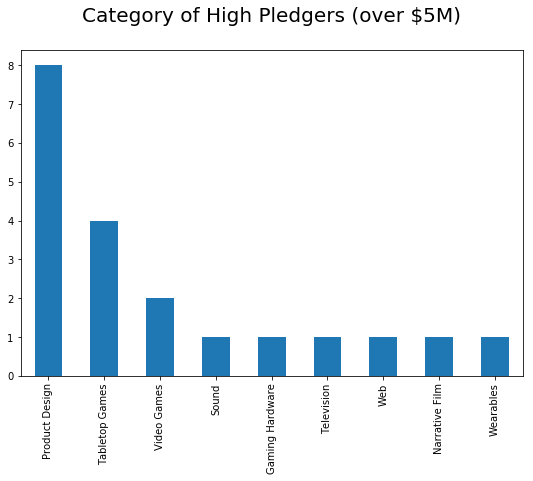

Product Design     8
Tabletop Games     4
Video Games        2
Sound              1
Gaming Hardware    1
Television         1
Web                1
Narrative Film     1
Wearables          1
Name: category, dtype: int64


In [49]:
highPledge['category'].value_counts().plot(kind='bar',
                                           figsize=(9,6))
plt.title('Category of High Pledgers (over $5M)\n',fontsize=20)
plt.show()
print(highPledge['category'].value_counts())

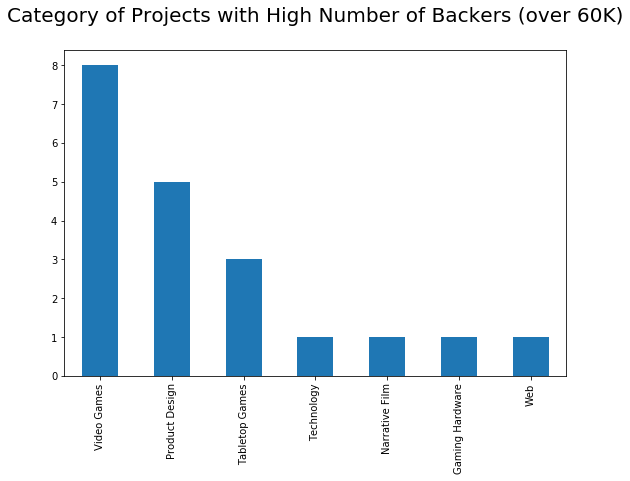

Video Games        8
Product Design     5
Tabletop Games     3
Technology         1
Narrative Film     1
Gaming Hardware    1
Web                1
Name: category, dtype: int64


In [50]:
highBacker['category'].value_counts().plot(kind='bar',
                                           figsize=(9,6))
plt.title('Category of Projects with High Number of Backers (over 60K)\n',fontsize=20)
plt.show()
print(highBacker['category'].value_counts())

The highest pledged and backed categories are Product Design, Tabletop Games and Video Games. 

In [51]:
print('Project with the most backers: ' + highBacker['name'][187652])
print('Project with the most money pledged: ' + highPledge['name'][157270])

Project with the most backers: Exploding Kittens
Project with the most money pledged: Pebble Time - Awesome Smartwatch, No Compromises


In [52]:
highBacker[highBacker['name']==highBacker['name'][187652]]

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,launched_month,launched_year
187652,1955357092,Exploding Kittens,Tabletop Games,Games,USD,2015-02-20,10000.0,2015-01-20 19:00:19,8782571.99,successful,219382,US,8782571.99,8782571.99,10000.0,1,2015


'Exploding Kittens'???!!! Are you kidding me??

In [53]:
highPledge[highPledge['name']==highPledge['name'][157270]]

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,launched_month,launched_year
157270,1799979574,"Pebble Time - Awesome Smartwatch, No Compromises",Product Design,Design,USD,2015-03-28,500000.0,2015-02-24 15:44:42,20338986.27,successful,78471,US,20338986.27,20338986.27,500000.0,2,2015


Huge success. Check them out.

# Extra Credit

Now since I am in the Restaurant industry, and have a little experience in the CPG field, I thought it would be interesting to review the main category 'Food'. Yum. Let's jump in!

In [54]:
kickFood = kick[kick['main_category']=='Food']

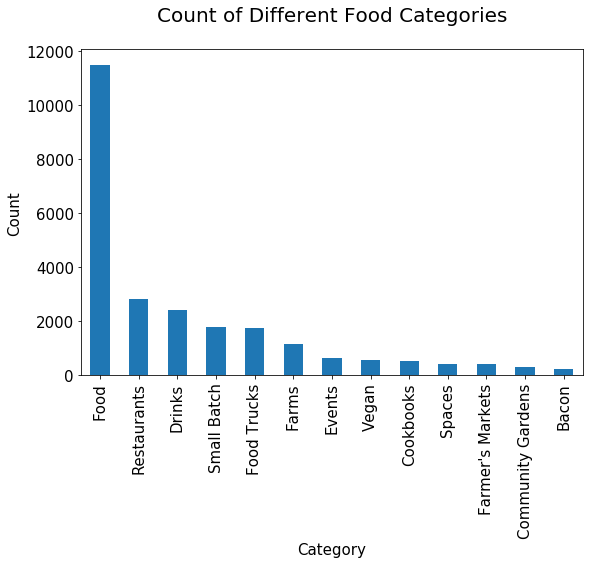

Food                 11493
Restaurants           2819
Drinks                2422
Small Batch           1808
Food Trucks           1752
Farms                 1154
Events                 655
Vegan                  588
Cookbooks              540
Spaces                 428
Farmer's Markets       424
Community Gardens      298
Bacon                  221
Name: category, dtype: int64


In [55]:
kickFood['category'].value_counts().plot(kind='bar',fontsize=15,figsize=(9,6))
plt.title('Count of Different Food Categories\n',fontsize=20)
plt.xlabel('Category',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()
print(kickFood['category'].value_counts())

Hmm. This graph looks a little funky. Why are there so many instances in the 'Food' category when the main category is already 'Food'? Seems that a lot of Kickstarter projects do not label themselves very specificly when launching a Kickstarter project. 

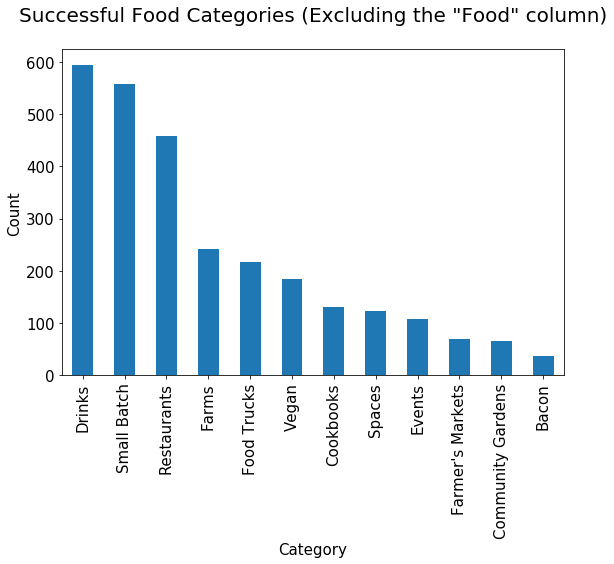

Drinks               594
Small Batch          557
Restaurants          457
Farms                242
Food Trucks          217
Vegan                185
Cookbooks            130
Spaces               124
Events               108
Farmer's Markets      70
Community Gardens     66
Bacon                 38
Name: category, dtype: int64


In [56]:
kickFood[kickFood['state']=='successful']['category'].value_counts()[1:].plot(kind='bar',
                                                                              figsize=(9,6))
plt.title('Successful Food Categories (Excluding the "Food" column)\n',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Category',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()
print(kickFood[kickFood['state']=='successful']['category'].value_counts()[1:])

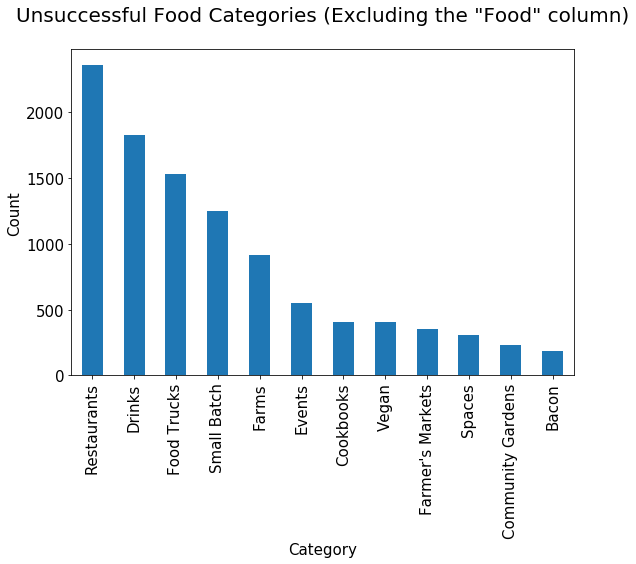

Restaurants          2362
Drinks               1828
Food Trucks          1535
Small Batch          1251
Farms                 912
Events                547
Cookbooks             410
Vegan                 403
Farmer's Markets      354
Spaces                304
Community Gardens     232
Bacon                 183
Name: category, dtype: int64


In [57]:
kickFood[kickFood['state']!='successful']['category'].value_counts()[1:].plot(kind='bar',
                                                                            figsize=(9,6))
plt.title('Unsuccessful Food Categories (Excluding the "Food" column)\n',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Category',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()
print(kickFood[kickFood['state']!='successful']['category'].value_counts()[1:])

In [58]:
print('{}% of Kickstarter projects are successful.'.format(round(len(kick[kick['state']=='successful']) / len(kick)*100),3))
print('{}% of Food Kickstarter projects are successful.'.format(round(len(kickFood[kickFood['state']=='successful']) / len(kickFood)*100),3))

35% of Kickstarter projects are successful.
25% of Food Kickstarter projects are successful.


10% less in Kickstarter success rate between Food Kickstarter projects and the average Kickstarter success rate. No Bueno.

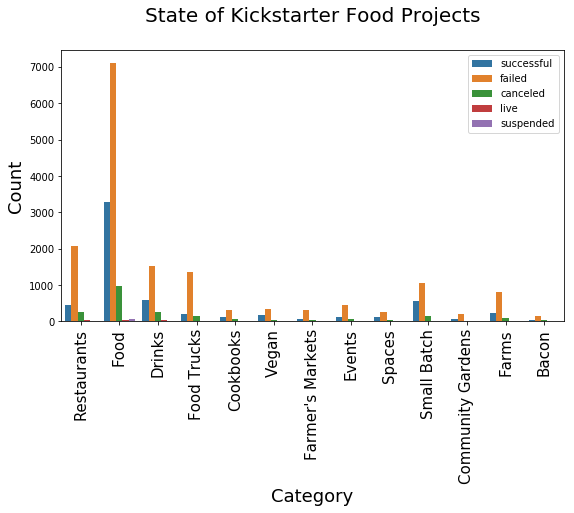

In [63]:
plt.figure(figsize=(9,5))
#fig,ax = plt.subplots(figsize=(9,6))
sns.countplot(kickFood['category'],hue=kickFood['state'])
plt.title('State of Kickstarter Food Projects\n',fontsize=20)
plt.xticks(rotation=90,fontsize=15)
plt.xlabel('Category',fontsize=18)
plt.ylabel('Count',fontsize=18)
plt.legend(loc=1)
plt.show()

In [64]:
for i in kickFood['category'].unique():
    '''
    str round [('successful') & ('category')] / (number in category) * 100
    '''
    print(i + ' category success rate: {}%'.format(str(round(len(kickFood[(kickFood['state']=='successful') & (kickFood['category']==i)]) / len(kickFood[kickFood['category']==i])*100))))

Restaurants category success rate: 16%
Food category success rate: 29%
Drinks category success rate: 25%
Food Trucks category success rate: 12%
Cookbooks category success rate: 24%
Vegan category success rate: 31%
Farmer's Markets category success rate: 17%
Events category success rate: 16%
Spaces category success rate: 29%
Small Batch category success rate: 31%
Community Gardens category success rate: 22%
Farms category success rate: 21%
Bacon category success rate: 17%


The most successful categories within the main category Food are Vegan (31% success) and Small Batch (31% success), followed Spaces (29% success). The 'Food' category (29% success), is too vague to analyze with this line of code. Food Trucks (12% success), love y'all but sorry. Maybe there is another way to raise funds???

# Hope y'all enjoyed my run down. Feedback is always appreciated. Thank you!